## Data Preprocessing & Augmentation

In [194]:
import numpy as np 
import matplotlib.pyplot as plt 

SEISMIC_PATH = '/Users/jayanthboddu/Desktop/data_science/upgrad/MSDS/experiments_feb/data/faciesmark/train/train_seismic.npy'

In [195]:
seismic = np.load(SEISMIC_PATH)
seismic.shape

(401, 701, 255)

In [196]:
display('min', np.min(seismic), 'max' , np.max(seismic))

'min'

-1.0

'max'

1.0

The dataset is already scaled to [-1,1]

In [197]:
# frequency distribution
def fspectra(data, dt = 2):
    """
    Calculate the frequency spectra
    """
    # Amplitude values
    
    # Get the absolute value of the Fourier coefficients
    fc = np.abs(np.fft.rfft(data, axis = -1))
    # Take the mean to get the amplitude values of the spectra
    a = np.mean(fc, axis = 0)
    # Get the frequency values corresponding to the coefficients
    # We need the length of the window and the sample interval in seconds 
                
    dts = dt / 1000
    length = data.shape[-1]
                
    f = np.fft.rfftfreq(length, d = dts)
               
    return f, a

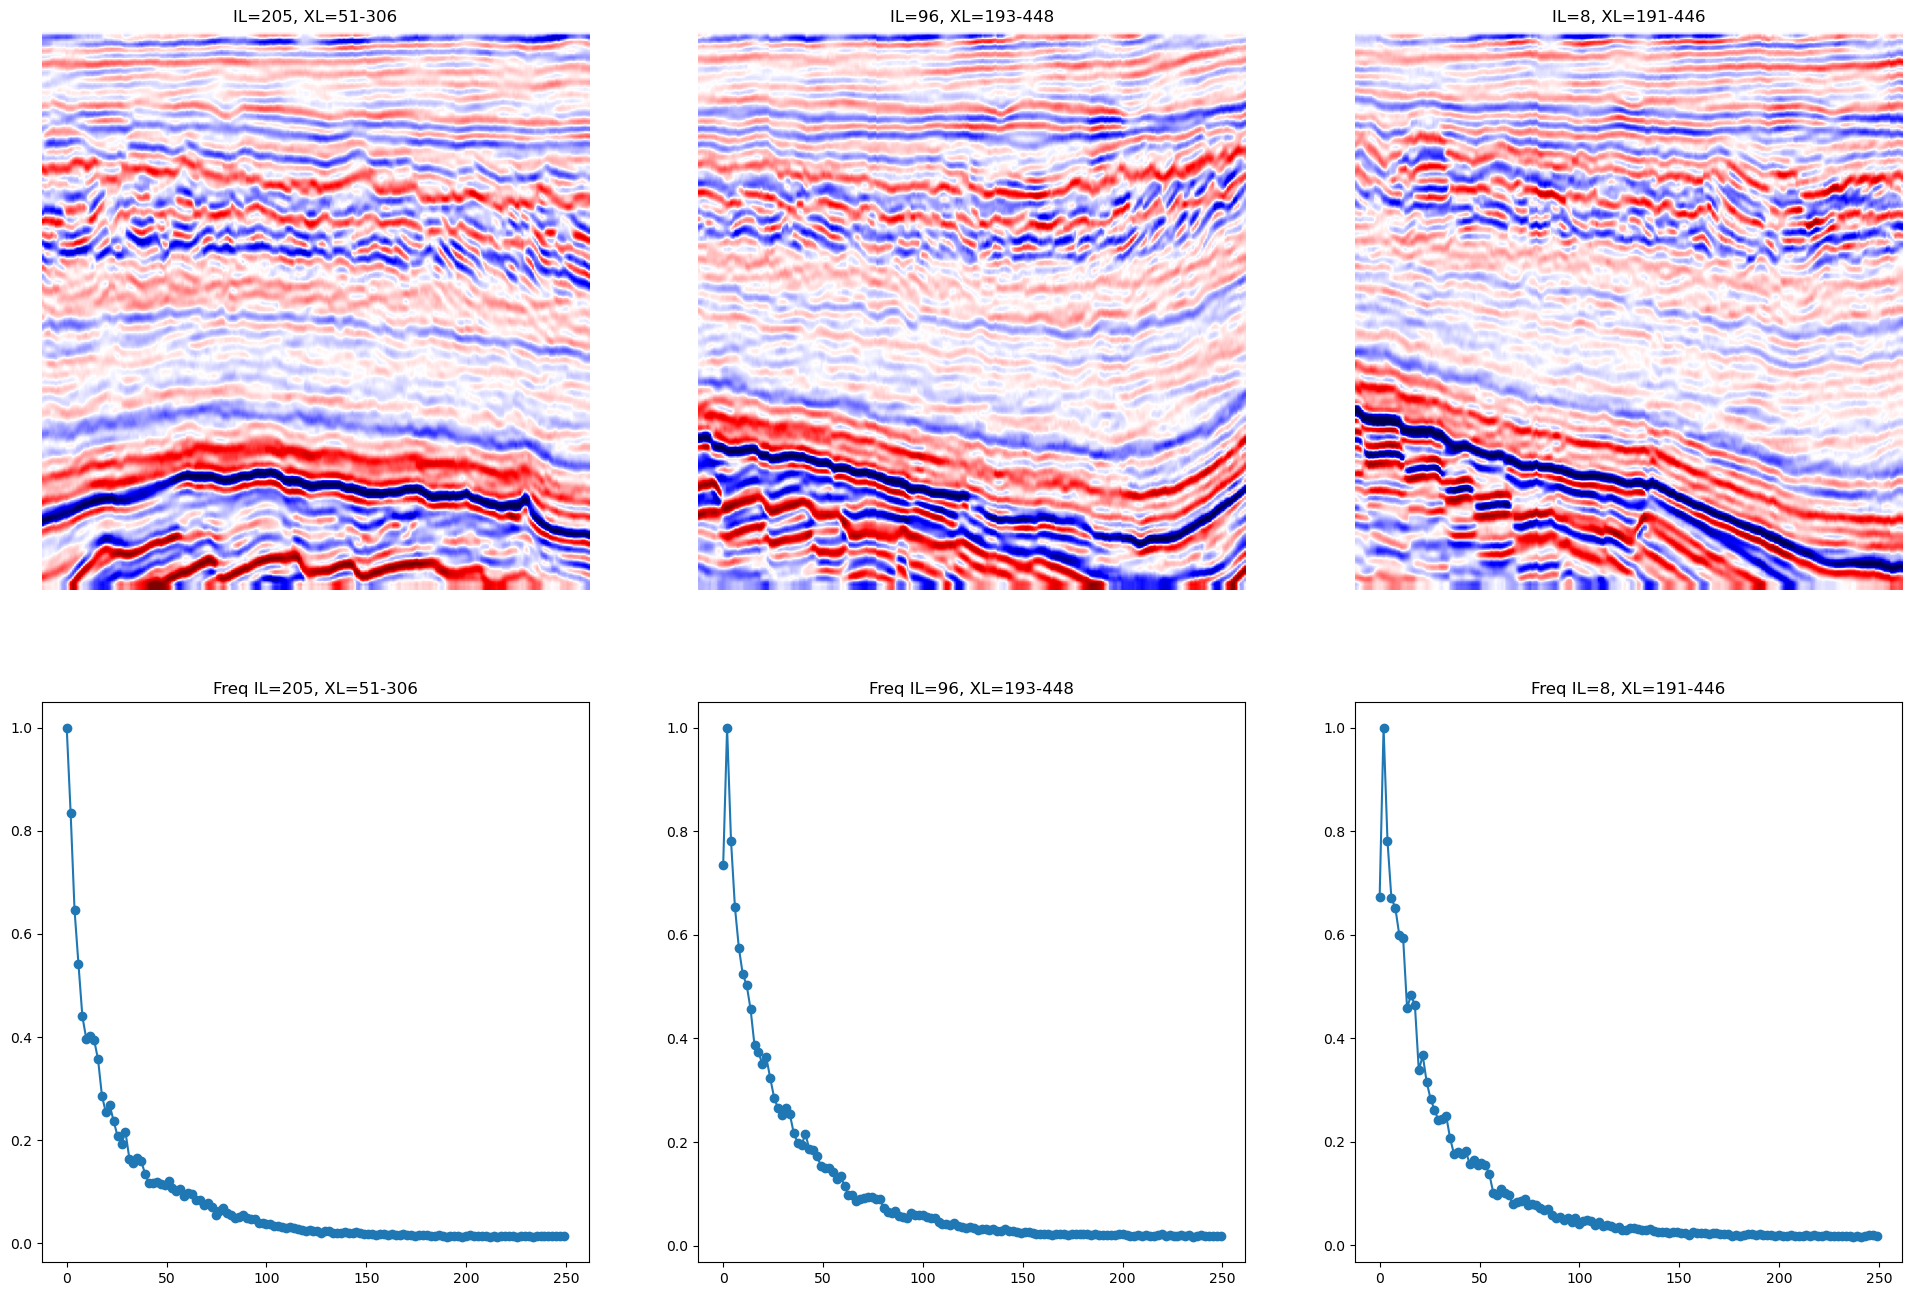

In [198]:
plot_params = dict(
    aspect='auto', 
    cmap='seismic',
    vmin = -1, 
    vmax = 1
)


fig, ax = plt.subplots(nrows=2, ncols = 3, figsize=(8*3,8 * 2))

for i in range(3) : 
    random_inline = np.random.choice(range(401))
    random_xline_start = np.random.choice(range(501 - 255))
    
    image = seismic[random_inline, random_xline_start : random_xline_start + 255 , :].T
    
    ax[0][i].imshow(image , **plot_params)
    ax[0][i].set_title(f"IL={random_inline}, XL={random_xline_start}-{random_xline_start + 255}")
    ax[0][i].axis('off')
    
    f,a = fspectra(image, dt=2)
    
    ax[1][i].plot(f,a / np.max(a), label='simple',marker='o')
    
    ax[1][i].set_title(f"Freq IL={random_inline}, XL={random_xline_start}-{random_xline_start + 255}")
    
plt.show()

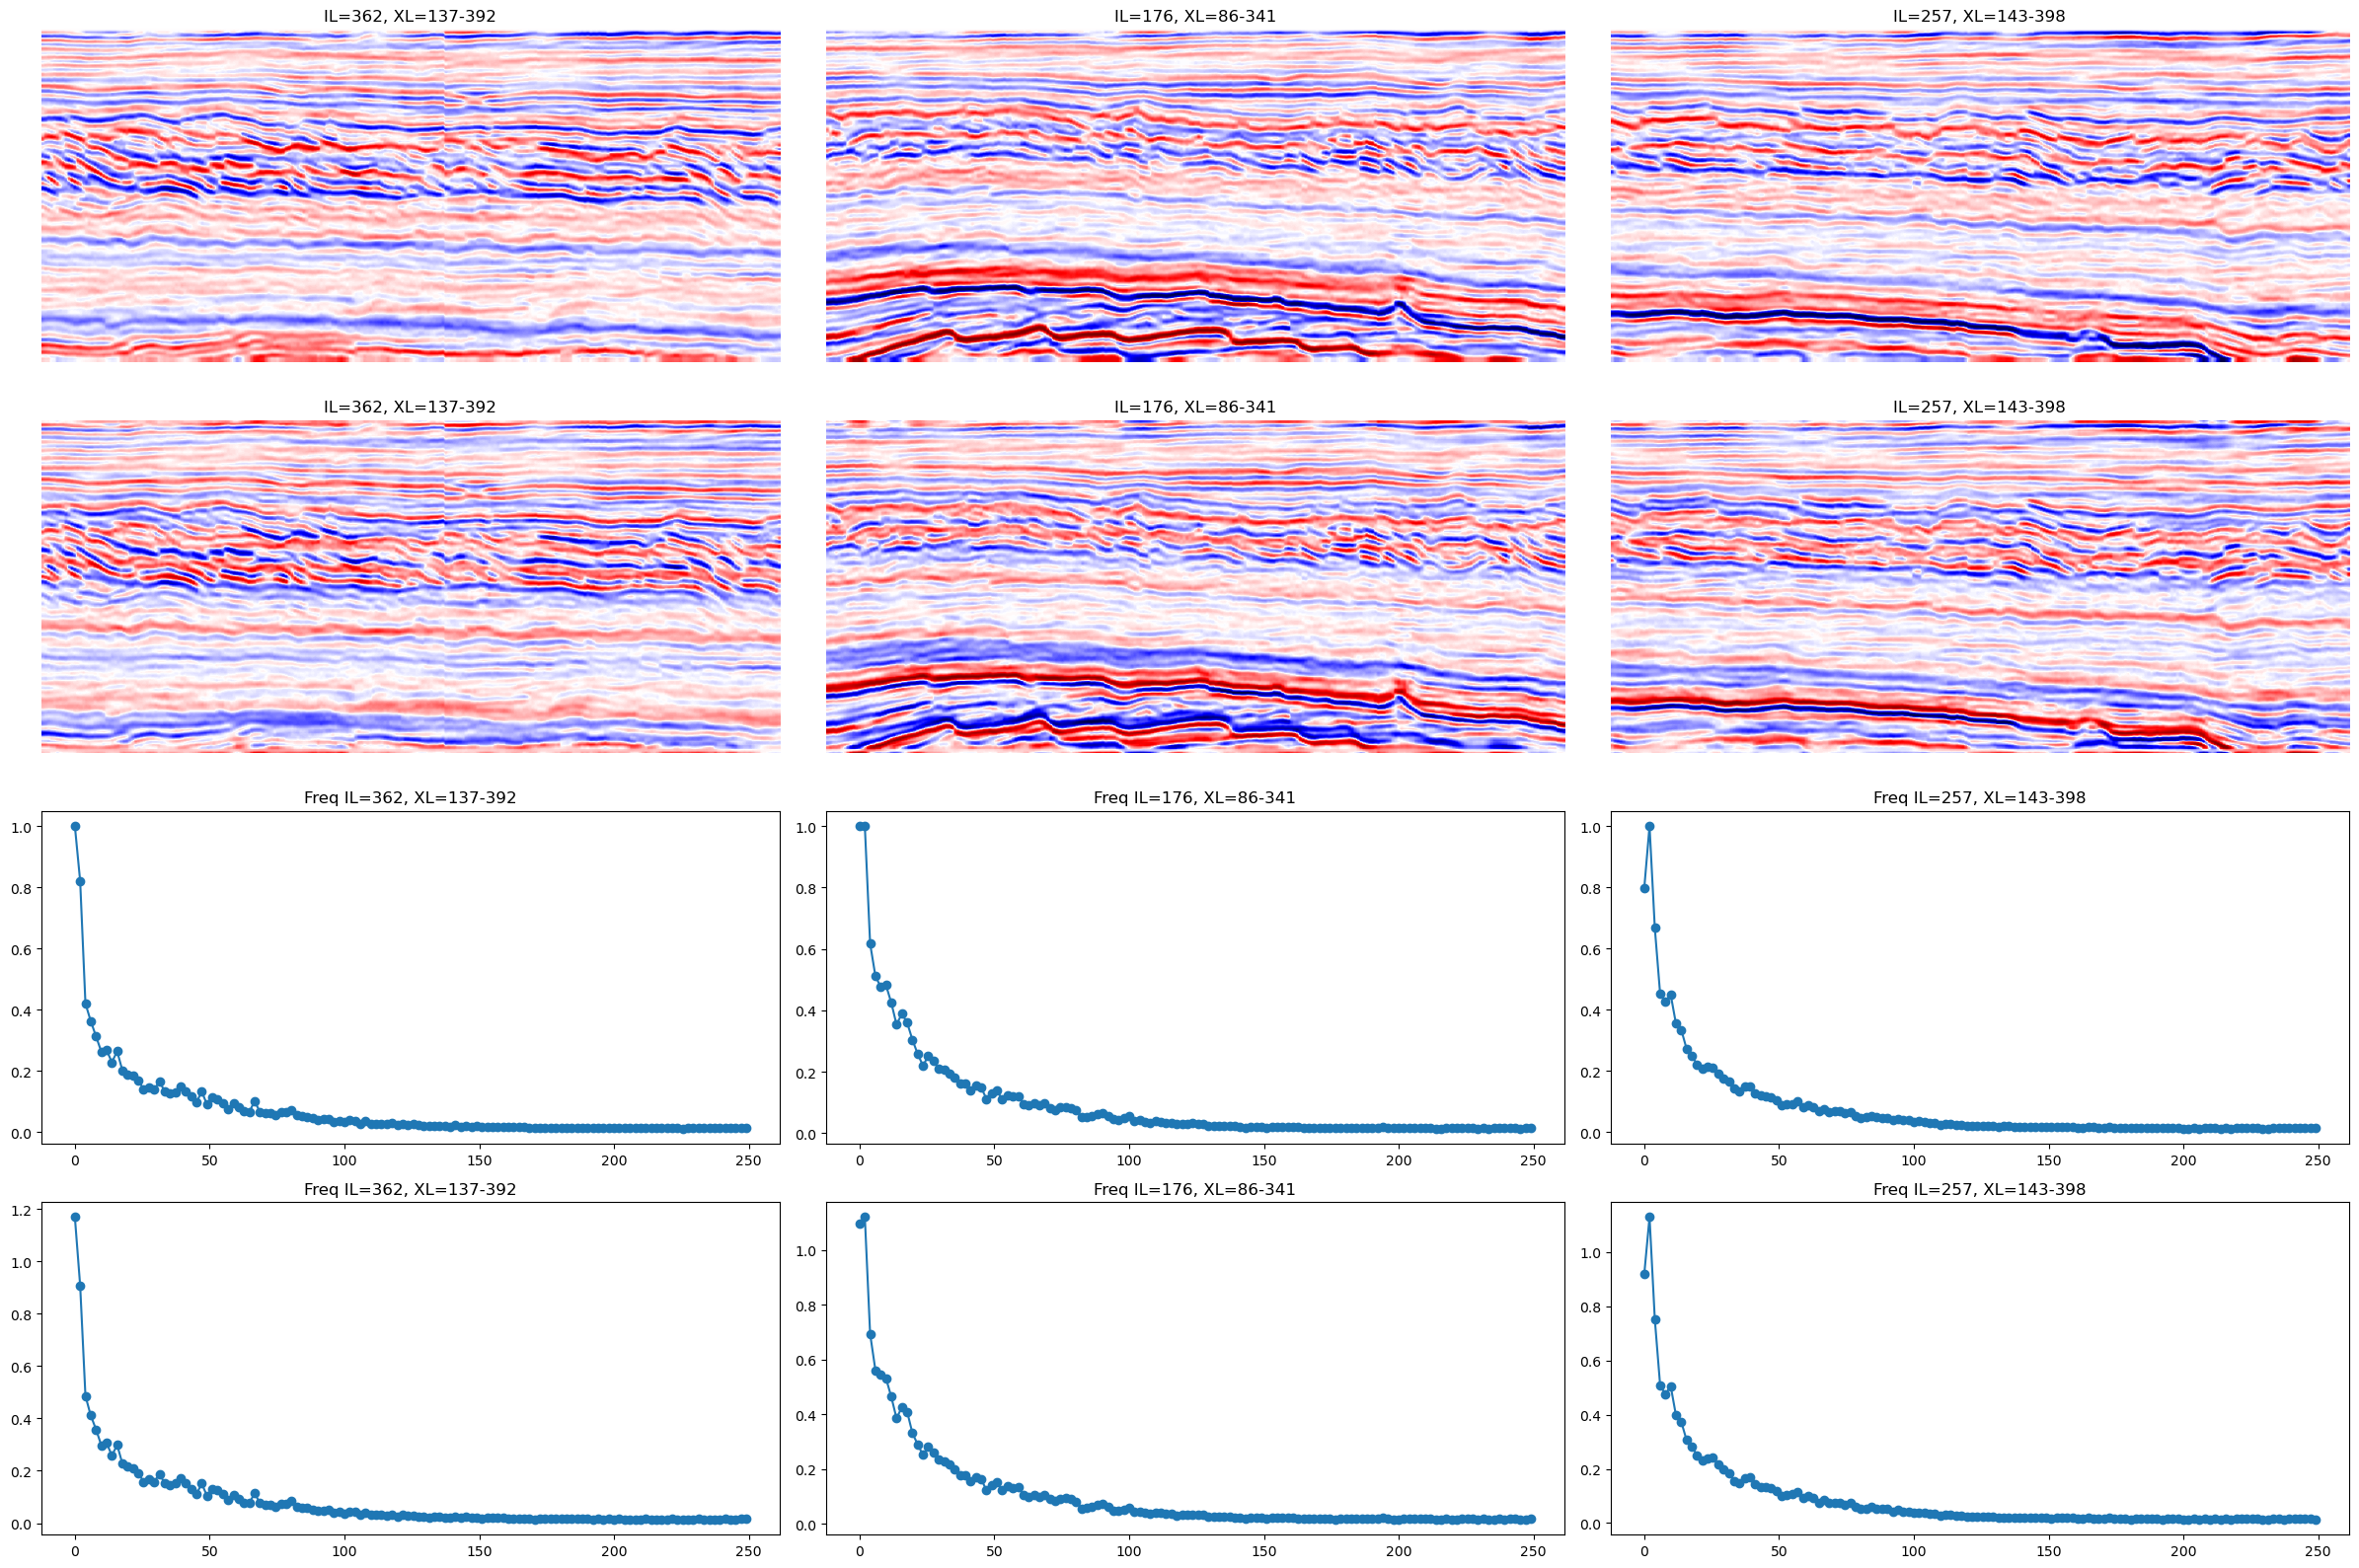

In [204]:
# Splitting into real and imaginary and their spectra
from scipy.signal import hilbert 

seismic_real , seismic_imag = np.real(hilbert(seismic)) , np.imag(hilbert(seismic))

fig, ax = plt.subplots(nrows=4, ncols = 3, figsize=(8*3,8 * 2))

for i in range(3) : 
    random_inline = np.random.choice(range(401))
    random_xline_start = np.random.choice(range(501 - 255))
    
    image_ = seismic_real[random_inline, random_xline_start : random_xline_start + 255 , :].T
    image_imag = seismic_imag[random_inline, random_xline_start : random_xline_start + 255 , :].T
    
    ax[0][i].imshow(image_ , **plot_params)
    ax[0][i].set_title(f"IL={random_inline}, XL={random_xline_start}-{random_xline_start + 255}")
    ax[0][i].axis('off')
    
    ax[1][i].imshow(image_imag , **plot_params)
    ax[1][i].set_title(f"IL={random_inline}, XL={random_xline_start}-{random_xline_start + 255}")
    ax[1][i].axis('off')
    
    f_real,a_real = fspectra(image_, dt=2)
    
    f_imag,a_imag = fspectra(image_imag, dt=2)
    
    ax[2][i].plot(f_real,a_real / np.max(a_real), label='simple',marker='o')
    
    ax[2][i].set_title(f"Freq IL={random_inline}, XL={random_xline_start}-{random_xline_start + 255}")

    ax[3][i].plot(f_imag,a_imag / np.max(a), label='simple',marker='o')
    
    ax[3][i].set_title(f"Freq IL={random_inline}, XL={random_xline_start}-{random_xline_start + 255}")

plt.tight_layout()
plt.show()

In [203]:
from scipy.signal import hilbert

x = np.real(hilbert(seismic))
x.shape

(401, 701, 255)

In [ ]:
np.real(seismic_real)

NameError: name 'seismic_real' is not defined

(701, 255)